In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv')


In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
X = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
Y = df['price']

In [10]:
X = sm.add_constant(X)

In [12]:
model = sm.OLS(Y,X)

In [16]:
# train the model
res = model.fit()

In [17]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     3377.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:12:46   Log-Likelihood:            -2.9619e+05
No. Observations:               21613   AIC:                         5.924e+05
Df Residuals:                   21600   BIC:                         5.925e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.193e+06   1.38e+05     44.756

In [20]:
X = df[['bedrooms', 'bathrooms']]
Y = df['price']

X = sm.add_constant(X)
model = sm.OLS(Y,X)
# train the model
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     4154.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:17:46   Log-Likelihood:            -3.0409e+05
No. Observations:               21613   AIC:                         6.082e+05
Df Residuals:                   21610   BIC:                         6.082e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.064e+04   8270.147     -3.705      0.0

In [24]:
grade_dummies = pd.get_dummies(df['grade'], dtype=int)
grade_dummies

,1,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0,0,0,0,0,0,1,0,0,0,0,0
21609,0,0,0,0,0,0,1,0,0,0,0,0
21610,0,0,0,0,0,1,0,0,0,0,0,0
21611,0,0,0,0,0,0,1,0,0,0,0,0


In [26]:
df_new = pd.concat([df,grade_dummies], axis=1)

In [27]:
df_new.columns

Index([           'id',          'date',         'price',      'bedrooms',
           'bathrooms',   'sqft_living',      'sqft_lot',        'floors',
          'waterfront',          'view',     'condition',         'grade',
          'sqft_above', 'sqft_basement',      'yr_built',  'yr_renovated',
             'zipcode',           'lat',          'long', 'sqft_living15',
          'sqft_lot15',               1,               3,               4,
                     5,               6,               7,               8,
                     9,              10,              11,              12,
                    13],
      dtype='object')

In [30]:
X = df_new[['bedrooms','bathrooms','sqft_living','sqft_lot','floors',
          'waterfront','view','condition', 
          'sqft_above', 'sqft_basement','yr_built',  'yr_renovated',
             'zipcode','lat','long', 'sqft_living15',
          'sqft_lot15',1,3,4,5,6,7,8,9,10,11,12,13]]
Y = df_new['price']

X = sm.add_constant(X)
model = sm.OLS(Y,X)
# train the model
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     2162.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:28:03   Log-Likelihood:            -2.9345e+05
No. Observations:               21613   AIC:                         5.870e+05
Df Residuals:                   21585   BIC:                         5.872e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.597e+06   2.57e+06      2.953

In [43]:
print(len(res.params.to_list()))

30


In [35]:
print(res.params)

const            7.597022e+06
bedrooms        -1.984950e+04
bathrooms        4.351300e+04
sqft_living      8.826282e+01
sqft_lot         1.277509e-01
floors           2.523454e+04
waterfront       5.682358e+05
view             4.863291e+04
condition        3.313236e+04
sqft_above       4.466434e+01
sqft_basement    4.358350e+01
yr_built        -2.153649e+03
yr_renovated     3.060892e+01
zipcode         -5.961075e+02
lat              6.188909e+05
long            -2.076272e+05
sqft_living15    2.730591e+01
sqft_lot15      -3.855067e-01
1                3.467813e+05
3                4.019772e+05
4                2.200862e+05
5                1.918080e+05
6                2.148182e+05
7                2.534636e+05
8                3.127919e+05
9                4.334470e+05
10               5.965584e+05
11               8.404054e+05
12               1.290767e+06
13               2.494118e+06
dtype: float64


In [45]:
predictions = res.predict(X)

In [46]:
predictions

0        204169.551563
1        720992.301694
2        440297.463080
3        478702.725293
4        400047.580964
             ...      
21608    495271.379916
21609    410664.833550
21610    173406.868856
21611    372877.650414
21612    175590.426041
Length: 21613, dtype: float64

In [48]:
with_pred = df_new.join(predictions.to_frame())

In [50]:
with_pred['pred_vs_actual'] = with_pred[0]-with_pred['price']

<Axes: xlabel='pred_vs_actual', ylabel='Count'>

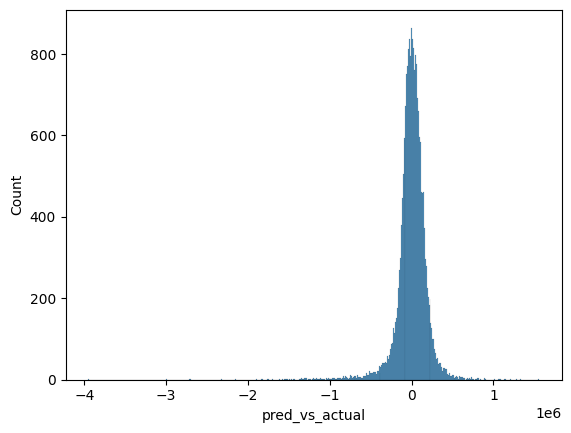

In [53]:
sns.histplot(with_pred['pred_vs_actual'])

In [54]:
with_pred['sq_error'] = with_pred['pred_vs_actual']**2

In [55]:
np.sqrt(with_pred['sq_error'].mean())

190752.23692668136

In [56]:
190752/with_pred['price'].mean()

0.3531867953554491

<Axes: xlabel='bedrooms', ylabel='pred_vs_actual'>

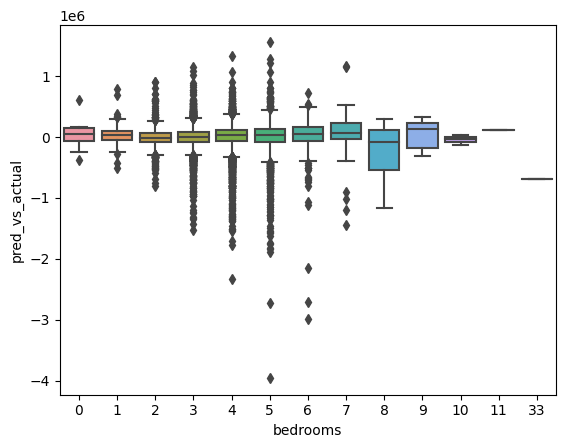

In [57]:
sns.boxplot(x=with_pred['bedrooms'], y=with_pred['pred_vs_actual'])

<Axes: xlabel='sqft_living', ylabel='pred_vs_actual'>

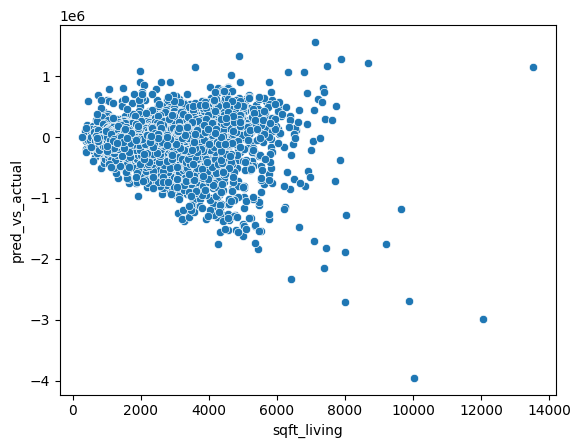

In [58]:
sns.scatterplot(x='sqft_living', y='pred_vs_actual', data=with_pred)